# **Project Name** - Unsupervised ML - Netflix Movies and TV Shows Clustering

##### **Project Type** - EDA/Clustering/Unsupervized
##### **Contribution** - Individual
##### **Team Number 1** - H.SaiSandeep

# **Project Summary -**

The dataset under analysis comprises television shows and movies available on Netflix as of 2020, sourced from Flixable, a third-party Netflix search engine. Notably, a 2018 report indicated a significant trend: a near tripling of TV show titles on the platform since 2010, contrasted with a decrease of over 2,000 movie titles during the same period. This project aims to extract further insights from this dataset.

The initial phase involved a comprehensive understanding of the dataset structure, followed by rigorous data cleaning procedures to prepare it for analytical processing. Exploratory Data Analysis (EDA) was conducted to discern inherent patterns and characteristics within the data.

To facilitate cluster creation, the dataset underwent preprocessing steps, including the removal of stop words, extraneous whitespace, and numerical characters. This process aimed to isolate salient terms relevant for identifying underlying thematic similarities between content items.

Subsequently, the optimal number of clusters was determined using the Silhouette Method and the K-Means Elbow Method. Based on the identified optimal 'k', K-Means clustering was applied to group similar content. Finally, a content-based recommender system was constructed utilizing cosine similarity on the clustered data, enabling the recommendation of the top ten most similar movies based on user preferences or viewing history.

# **GitHub Link -**

https://github.com/sandeep1297/Labmentix

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.

#### **Defining My Business Objective?**

To improve content discovery and personalization on Netflix by identifying natural clusters of shows and movies based on their themes, descriptions, and genres. These clusters can help:

By leveraging clustering and external metadata (e.g., IMDb ratings), the goal is to help Netflix deliver more relevant, diverse, and personalized content experiences to users.

*   Enhance recommendation algorithms
*   Support curated collections (e.g., "True Crime Docuseries", "Short Feel-Good Comedies")
*   Guide content acquisition decisions based on underserved clusters
*   Understand audience segments based on content clusters

By leveraging clustering and external metadata (e.g., IMDb ratings), the goal is to help Netflix deliver more relevant, diverse, and personalized content experiences to users.





## ***1. About My Data***

### Import Libraries

In [108]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

import requests
import time

from google.colab import files

import gzip

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import pairwise_distances

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import mode

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [3]:
# Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving Netflix_Dataset.csv to Netflix_Dataset.csv


In [86]:
# Loading Dataset
try:
    df = pd.read_csv("Netflix_Dataset.csv")
    print("Loaded Dataset")
except Exception as e:
    print("Error loading data:", e)

Loaded Dataset


### Dataset First View

In [87]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [88]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [89]:
# Dataset Rows & Columns count
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 7787
Columns: 12


### Dataset Information

In [90]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [91]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


#### Missing Values/Null Values

In [92]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


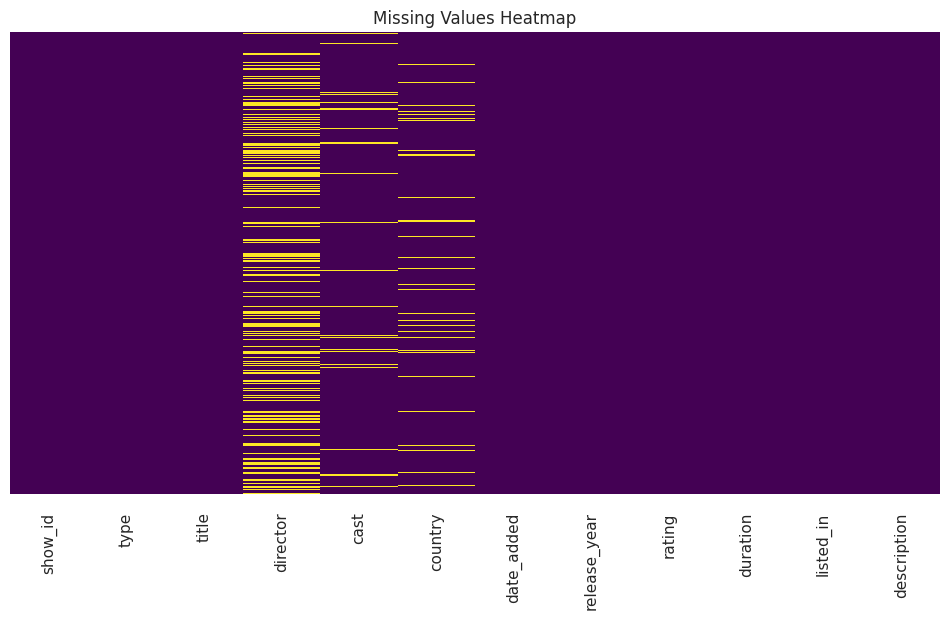

In [93]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What I know about my dataset?




*   The dataset contains Netflix titles, including both TV Shows and Movies.

*   Each row represents a unique title with attributes like:

     *   Title, Type, Description, Genre (listed_in), Cast, Country, Duration, Date Added, and Release Year.



*   It includes text-based fields (e.g., description) that can be used for content-based analysis.

*   There are missing values in some columns like director, cast, country, date_added and rating.
*   There are no duplicate records, which need to be handled.


*   The dataset is suitable for exploratory data analysis, clustering, and recommendation system prototyping.


*   The genres are multi-label (i.e., one title may belong to multiple genres).


*   The data is real-world, so it contains noise, inconsistencies, and missing fields that require preprocessing.



## Adding IMDB ratings to the dataset

In [182]:
# Step 1: Download IMDb datasets
!wget https://datasets.imdbws.com/title.basics.tsv.gz
!wget https://datasets.imdbws.com/title.ratings.tsv.gz

--2025-05-11 12:51:55--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 108.156.107.22, 108.156.107.119, 108.156.107.5, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|108.156.107.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205689417 (196M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 196.16M   267MB/s    in 0.7s    

2025-05-11 12:51:55 (267 MB/s) - ‘title.basics.tsv.gz’ saved [205689417/205689417]

--2025-05-11 12:51:56--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 108.156.107.22, 108.156.107.119, 108.156.107.5, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|108.156.107.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7885144 (7.5M) [binary/octet-stream]
Saving to: ‘title.ratings.tsv.gz’

title.ratings.tsv.g 100%[==============

In [183]:
# Step 2: Load IMDb basics and ratings
def load_tsv_gz(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        return pd.read_csv(f, sep='\t', low_memory=False)

basics = load_tsv_gz('title.basics.tsv.gz')
ratings = load_tsv_gz('title.ratings.tsv.gz')

In [186]:
# Step 3: Filter valid movie/tvSeries entries
basics_raw = load_tsv_gz('title.basics.tsv.gz')

# Fix data types
if 'isAdult' in basics_raw.columns:
    basics_raw['isAdult'] = pd.to_numeric(basics_raw['isAdult'], errors='coerce')

if 'startYear' in basics_raw.columns:
    basics_raw['startYear'] = pd.to_numeric(basics_raw['startYear'], errors='coerce')

# Now apply filters
basics = basics_raw[
    (basics_raw['titleType'].isin(['movie', 'tvSeries'])) &
    (basics_raw['isAdult'] == 0)
]

basics = basics[['tconst', 'primaryTitle', 'startYear', 'titleType']].dropna()
print("Filtered basics shape:", basics.shape)


# Merge with IMDb ratings on tconst
imdb_df = pd.merge(basics, ratings, on='tconst')

# Clean and standardize
imdb_df = imdb_df.rename(columns={
    'primaryTitle': 'title',
    'startYear': 'year',
    'averageRating': 'IMDb_rating',
    'numVotes': 'num_votes'
})

# Normalize for merge
imdb_df['title'] = imdb_df['title'].astype(str).str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()
imdb_df['year'] = pd.to_numeric(imdb_df['year'], errors='coerce')

Filtered basics shape: (855523, 4)


In [187]:
print(basics.shape)
print(ratings.shape)


(855523, 4)
(1567164, 3)


In [188]:
print(len(set(basics['tconst']) & set(ratings['tconst'])))


428052


In [189]:
imdb_df.head()

tconst                         title    year titleType  IMDb_rating  \
0  tt0000009                    miss jerry  1894.0     movie          5.4   
1  tt0000147  the corbettfitzsimmons fight  1897.0     movie          5.3   
2  tt0000502                      bohemios  1905.0     movie          3.8   
3  tt0000574   the story of the kelly gang  1906.0     movie          6.0   
4  tt0000591              the prodigal son  1907.0     movie          5.6   

   num_votes  
0        224  
1        558  
2         21  
3        985  
4         31

In [190]:
# Step 4: Load Netflix dataset
netflix_df = pd.read_csv('Netflix_Dataset.csv')
netflix_df['title_clean'] = netflix_df['title'].str.lower().str.strip()
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')

# Step 5: Merge on title and year
merged = pd.merge(
    netflix_df,
    imdb_df,
    left_on=['title_clean', 'release_year'],
    right_on=['title', 'year'],
    how='left'
)

# Step 6: Save final dataset
merged.to_csv('/content/Netflix_with_IMDb.csv', index=False)

In [191]:
merged.head()

show_id     type title_x           director  \
0      s1  TV Show      3%                NaN   
1      s2    Movie    7:19  Jorge Michel Grau   
2      s3    Movie   23:59       Gilbert Chan   
3      s4    Movie       9        Shane Acker   
4      s5    Movie      21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description title_clean     tconst  \
0  In a future where the elite inhabit an island ...          3%        NaN   
1  After a devastating earthquake hits Mexico Cit...        7:19        NaN   
2  When an army recruit is found dead, his fellow...       23:59        NaN   
3  In a postapocalyptic world, rag-doll robots hi...           9  tt0472033   
4  A brilliant group of students become card-coun...          21  tt0478087   

  title_y    year titleType  IMDb_rating  num_votes  
0     NaN     NaN       NaN          NaN        NaN  
1     NaN     NaN       NaN          NaN        NaN  
2     NaN     NaN       NaN          NaN        NaN  
3       9  2009.0     movie          7.0   152881.0  
4      21  2008.0     movie          6.8   273968.0

In [194]:
merged[['title_x', 'release_year', 'IMDb_rating']].head(10)

title_x  release_year  IMDb_rating
0      3%          2020          NaN
1    7:19          2016          NaN
2   23:59          2011          NaN
3       9          2009          7.0
4      21          2008          6.8
5      46          2016          NaN
6     122          2019          5.6
7     187          1997          NaN
8     706          2019          5.3
9    1920          2008          6.4

In [195]:
# To download updated csv
files.download('/content/Netflix_with_IMDb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***2. Understanding My Variables***

In [94]:
# Dataset Columns
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

1. show_id
2. type
3. title
4. director
5. cast
6. country
7. date_added
8. release_year
9. rating
10. duration
11. listed_in
12. description


In [95]:
# Dataset Describe
df.describe(include='all')

show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   
top     Raúl Campos, Jan Suter  David Attenborough  United States   
freq                        18                  18           2555   
mean                       NaN                 NaN            NaN   
std                        NaN                 NaN            NaN   
min                        NaN                 NaN            NaN   
25%                        NaN                 NaN            NaN   
50%                        NaN                 NaN            NaN   
75%                        NaN                 NaN            NaN   
max                        NaN                 NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

# Variables Description


# Dataset Column Description

**Column Overview:**

- **`show_id`**: Unique identifier for each Netflix title (if available).
- **`type`**: Indicates whether the title is a *Movie* or a *TV Show*.
- **`title`**: Title of the Netflix content.
- **`director`**: Director's name. May be missing for some titles.
- **`cast`**: Comma-separated list of actors in the title.
- **`country`**: Country/countries of production.
- **`date_added`**: The date when the title was added to Netflix.
- **`release_year`**: Year the title was originally released.
- **`rating`**: Content rating (e.g., TV-MA, PG, R, etc.).
- **`duration`**: Duration in minutes (for movies) or number of seasons (for shows).
- **`listed_in`**: Comma-separated genres/categories associated with the title.
- **`description`**: A brief summary of the show or movie.

### Check Unique Values for each variable.

In [96]:
# Check Unique Values for each variable.
print(df.nunique())

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [97]:
# Copying Dataset before doing Data Wrangling
data = df.copy()

In [98]:
# Filling cast null values as Unknown
data['cast'] = data['cast'].fillna(value='Unknown')

# Filling contry null values as Unknown
data['country'] = data['country'].fillna(value='Unknown')

# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
data['director'] = data['director'].fillna(value='Unknown')

In [99]:
# Checking missing values again for confirmation
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [100]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [101]:
print("\nData Types:")
print(data.dtypes)


Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [102]:
print("Unique Values Per Column:\n")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values\n")

Unique Values Per Column:

show_id: 7770 unique values

type: 2 unique values

title: 7770 unique values

director: 4048 unique values

cast: 6818 unique values

country: 682 unique values

date_added: 1563 unique values

release_year: 73 unique values

rating: 14 unique values

duration: 216 unique values

listed_in: 491 unique values

description: 7752 unique values



### What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:


*   Filled missing values of cast with Unknown.

*   Filled missing values of country with Unknown.
*   Dropped rows of date_added missing values.



*   Dropped rows of ratings missing values.
*   Filled missing values of director with Unknown instead of dropping as it has more missing values.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1: Movies vs TV Shows Share

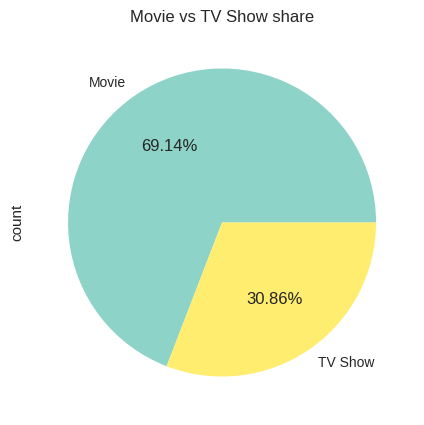

In [21]:
# Chart - 1 visualization code
# Pie Chart Visualization Code For Movie vs TV Show Share
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set3')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did I pick the specific chart?

A pie chart is an effective way to represent part-to-whole relationships within data. It allows for a clear visual comparison of percentages using distinct segments and colors. Since our analysis involved comparing proportions, a pie chart was the ideal choice. It enabled us to present the percentage breakdown in a simple and visually intuitive manner.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that the content on Netflix is not evenly distributed between movies and TV shows. Specifically, 69.14% of the titles are movies, while only 30.86% are TV shows. This indicates a significant skew toward movie content in Netflix’s library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business outcomes by informing content strategy and marketing efforts. Knowing the distribution of content types allows businesses to better target their audience and make informed decisions about future acquisitions or promotions. For instance, if user interest in TV shows is growing, the current imbalance might highlight an opportunity to invest more in TV content. There do not appear to be immediate negative implications, but overlooking audience preferences or content diversity in the long run could hinder growth.

## Chart - 2: Distribution of Various Ratings

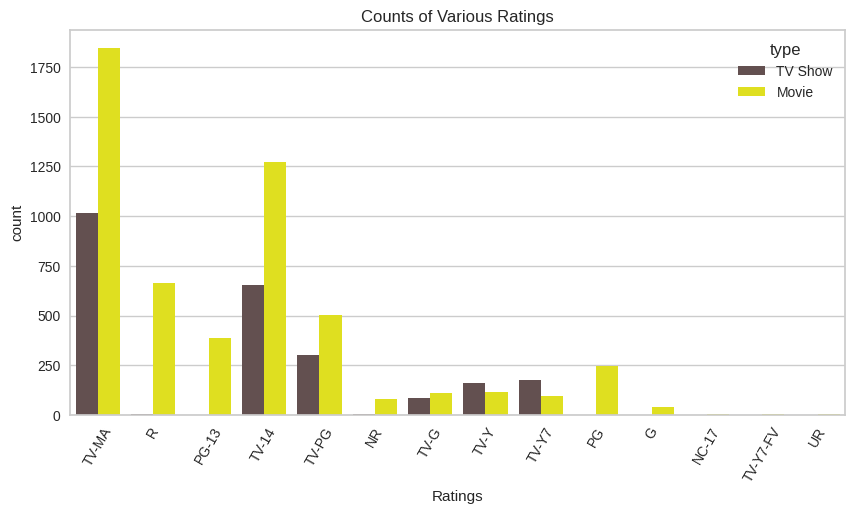

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [22]:
# Chart - 2 visualization code
# Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=['#664d4d', '#FFFF00'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did I pick the specific chart?

Bar charts are effective for comparing the frequency of different categories. They clearly show variations across groups and efficiently present large data in a compact format, making them ideal for our analysis.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most Netflix titles are rated TV-MA, followed by TV-14. NC-17 has the fewest titles, indicating limited content for that rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

## Chart - 3: Top 10 Countries with Most Content

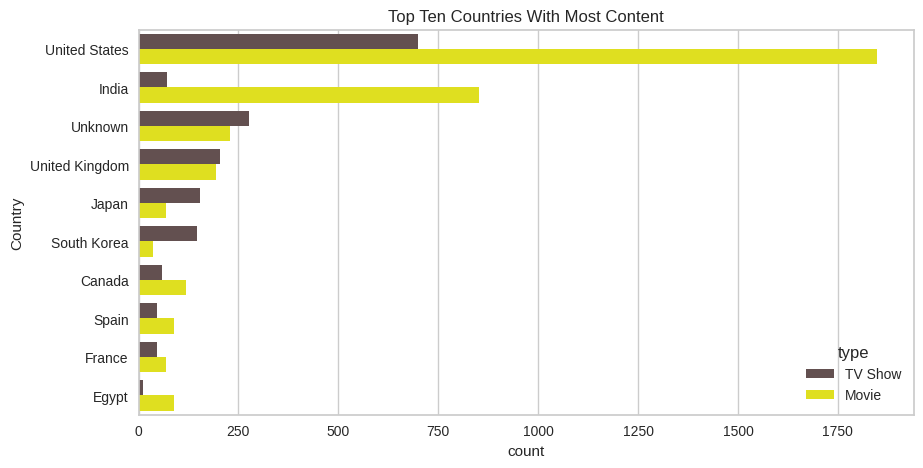

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1847
         India              852
         Unknown            229
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         France              69
TV Show  United States      699
         Unknown            276
         United Kingdom     203
         Japan              155
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Spain               45
Name: count, dtype: int64


In [23]:
# Chart - 3 visualization code
# Count Plot Visualization Code for Content Produced by Different Countries

# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#664d4d', '#FFFF00'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did I pick the specific chart?

Bar charts are ideal for comparing the frequency of different categories, making them useful for visualizing data across multiple countries. They allow large datasets to be displayed clearly and efficiently.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the United States leads in content production with 2,546 titles (1,847 movies and 699 TV shows), followed by India with 923 titles (852 movies and 71 TV shows).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:
* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

## Chart - 4: Content Released Over The Years

In [31]:
# Create New DataFrames for Movie and TV Show Release
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].groupby('release_year').size().to_frame(name='count').reset_index().rename(columns={'release_year':'year'})
show_year = release_year_df[release_year_df['type']=='TV Show'].groupby('release_year').size().to_frame(name='count').reset_index().rename(columns={'release_year':'year'})

In [32]:
print("Columns in movie_year:", movie_year.columns)
print("Columns in show_year:", show_year.columns)

Columns in movie_year: Index(['year', 'count'], dtype='object')
Columns in show_year: Index(['year', 'count'], dtype='object')


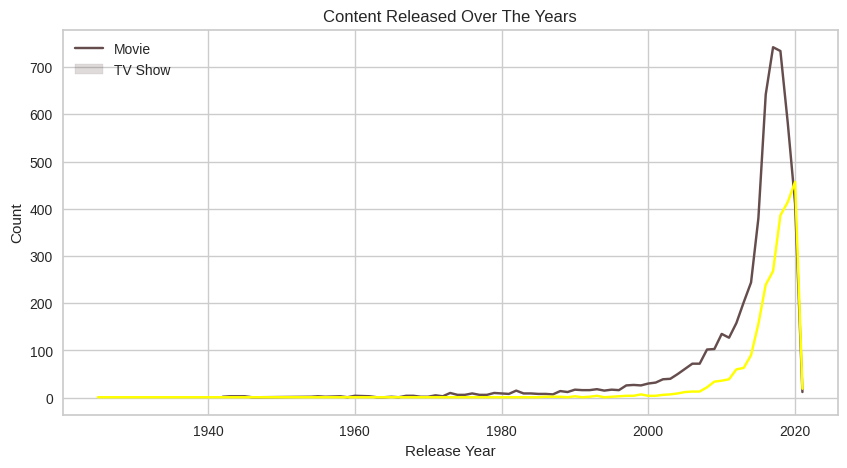

In [34]:
# Chart - 4 visualization code
# Line Plot Visualization Code for Content Released Over The Years
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='year', y='count', color = '#664d4d')
sns.lineplot(data=show_year, x='year', y='count', color = '#FFFF00')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [35]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            156
         2014             90
         2013             63
         2012             60
         2011             39
Name: count, dtype: int64


##### 1. Why did I pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years I have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Growth in the number of movies on Netflix is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

## Chart - 5: Content Added Over The Months

In [43]:
# Extracting Month from date_added Column
data['month_added'] = pd.DatetimeIndex(data['date_added']).month

# Create DataFrame To Store Month Values and Counts
months_df = data['month_added'].value_counts().to_frame(name='count').reset_index().rename(columns={'index':'month'})

In [45]:
months_df.columns

Index(['month_added', 'count'], dtype='object')

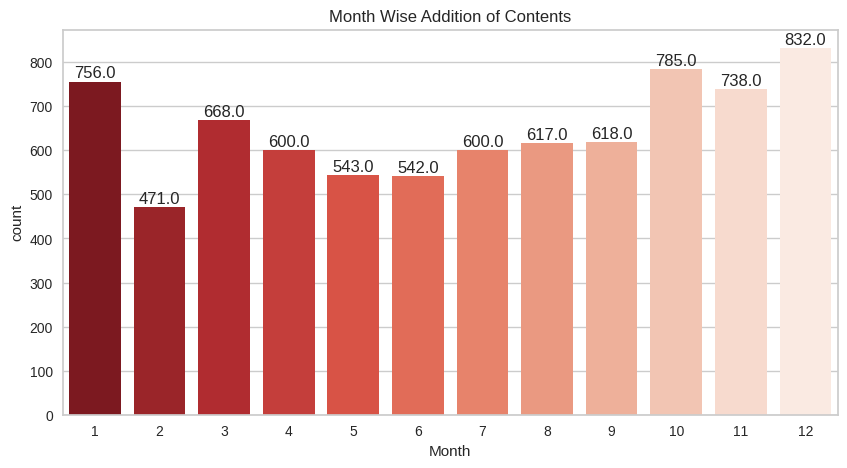

In [48]:
# Chart - 5 visualization code
# Count Plot Visualization Code for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month_added', y='count', palette='Reds_r')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

A histogram was chosen to analyze the distribution of movie durations on Netflix. It's ideal for identifying patterns, trends, or outliers in large datasets and helps visualize how frequently different duration ranges occur.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
* It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

## Chart - 6: Duration Distribution for Netflix Movies

In [49]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

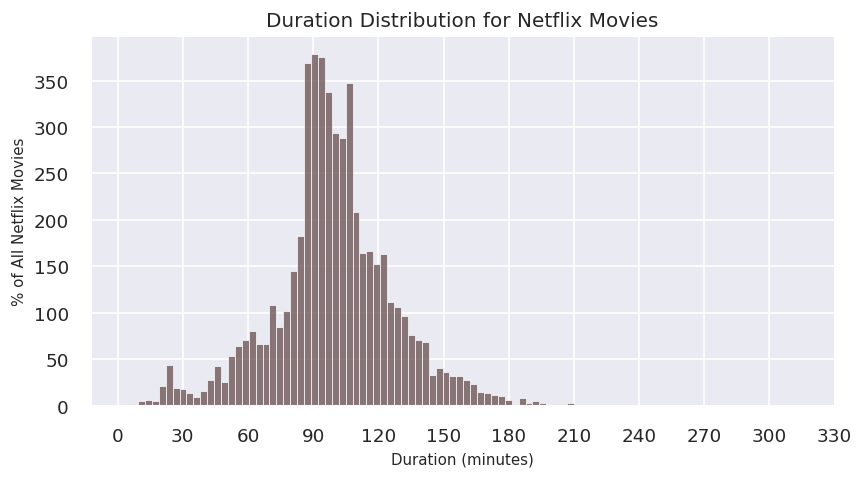

In [50]:
# Chart - 6 Visualization Code
# Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#664d4d')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

*  On netflix most of the movies last for 90 to 120 minutes.
*  So for target audience, movies duration will be greater than minimum 90 minutes.


## Chart - 7: Most Used Words in Shows Title

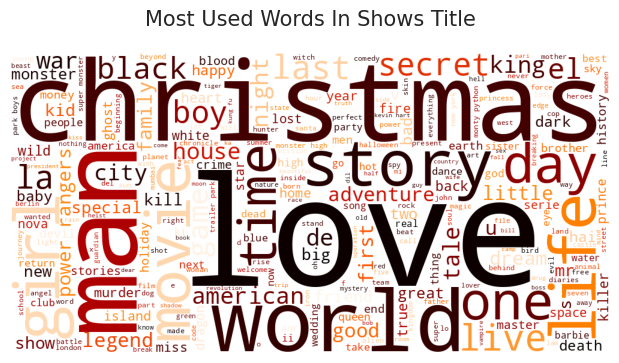

In [51]:
# Chart - 7 Visualization Code
# WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

A word cloud was chosen to visually highlight the most frequently occurring words in Netflix titles. It helps identify common themes and trends at a glance.

##### 2. What is/are the insight(s) found from the chart?

The most repeated words in titles include Christmas, Love, World, Man, and Story, suggesting popular themes or genres

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

## Chart - 8: Top 10 Genres on Netflix

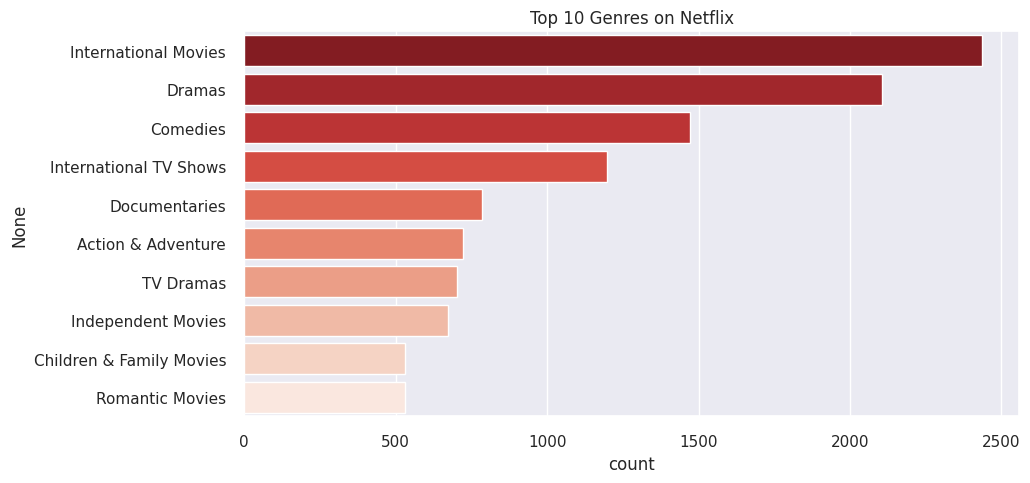

In [54]:
# Chart - 8 Visualization Code
# Count Plot Visualization Code for Top 10 Genres on Netflix
# Separating Genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

genres = genres.reset_index(drop=True)

# Set Labels and Ploting Graph for Top 10 Genres
plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10], palette = "Reds_r")
plt.title('Top 10 Genres on Netflix')

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

## Chart - 9: Top 10 Directors on Netflix

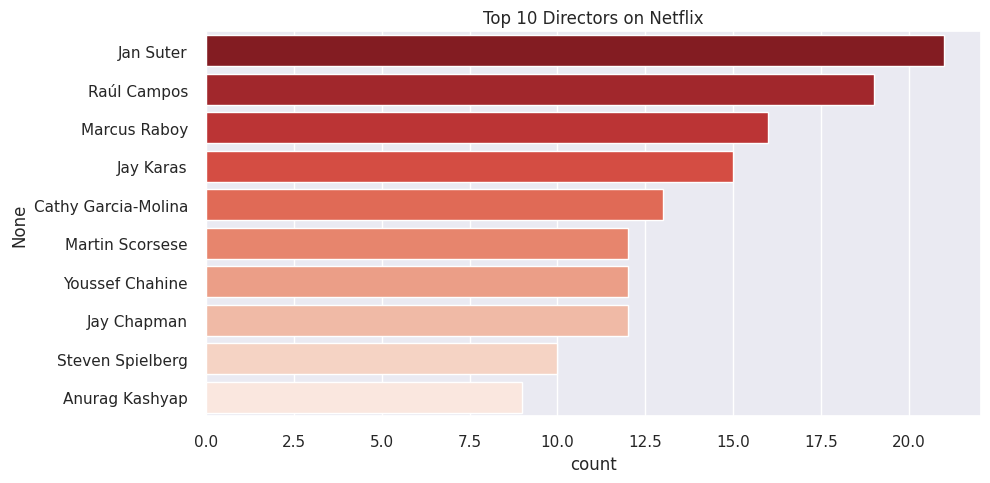

In [56]:
# Chart - 9 Visualization Code
# Count Plot Visualization Code for Top 10 Directors on Netflix
directors = data[data.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

directors = directors.reset_index(drop=True)

# Set Labels and Ploting Graph for Top 10 Directors
plt.figure(figsize=(10,5))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Directors on Netflix')

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

## Chart - 10: Top 10 Actors on Netflix

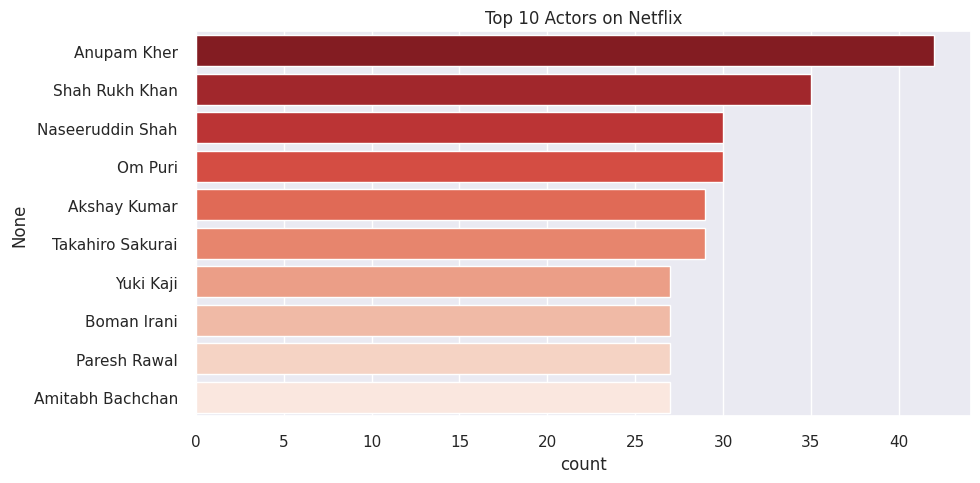

In [59]:
# Chart - 10 Visualization Code
# Count Plot Visualization Code for Top 10 Actors on Netflix
actor = data[data.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

actor = actor.reset_index(drop=True)

# Set Labels and Ploting Graph for Top 10 Actors
plt.figure(figsize=(10,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Actors on Netflix')

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.



## Chart - 11: Pair Plot

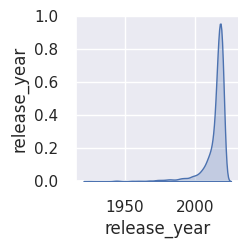

In [70]:
# Pair Plot Visualization Code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did I pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

# Plotting based on IMDb ratings

In [196]:
merged['IMDb_rating'] = pd.to_numeric(merged['IMDb_rating'], errors='coerce')

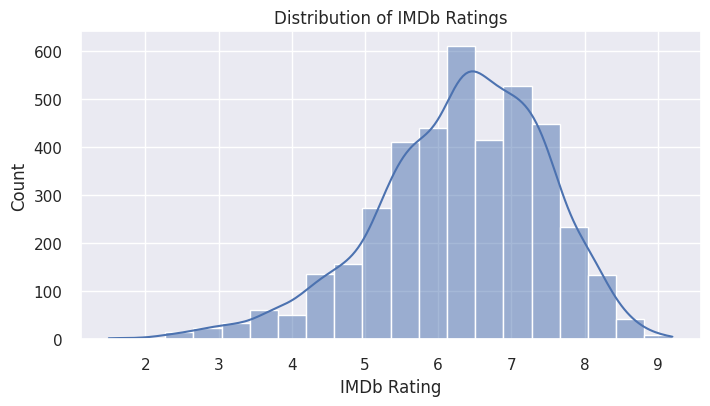

In [197]:
# --- Plot 1: Histogram ---
plt.figure(figsize=(8, 4))
sns.histplot(merged['IMDb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did I pick the specific chart?

To understand the distribution of IMDb ratings across all titles.

##### 2. What is/are the insight(s) found from the chart?



*   Ratings are heavily skewed toward higher scores (6–8 range).
*   Very few low-rated titles exist.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Netflix can focus content curation on titles with ≥6.5 ratings.
*   Helps recommender systems avoid promoting low-engagement titles.



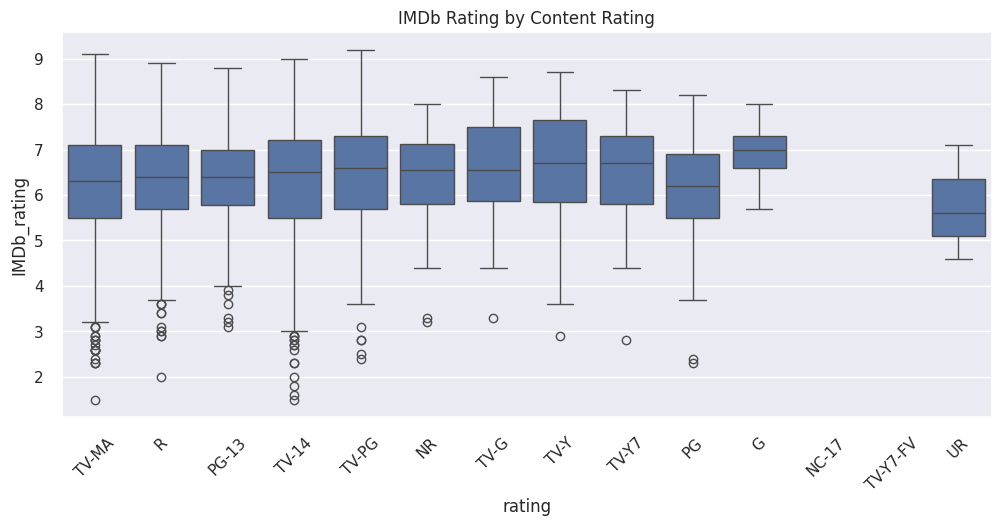

In [198]:
# --- Plot 2: Boxplot by Content Rating ---
plt.figure(figsize=(12, 5))
sns.boxplot(data=merged, x='rating', y='IMDb_rating')
plt.xticks(rotation=45)
plt.title('IMDb Rating by Content Rating')
plt.show()

##### 1. Why did I pick the specific chart?

To evaluate if content rating categories (like PG, TV-MA) correlate with audience reception.

##### 2. What is/are the insight(s) found from the chart?



*   PG-13 and R-rated content tends to have higher median ratings.
*   UR content has greater variability and outliers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Guides targeted content investment by age group.
*   Could inform parental control enhancements or featured selections.



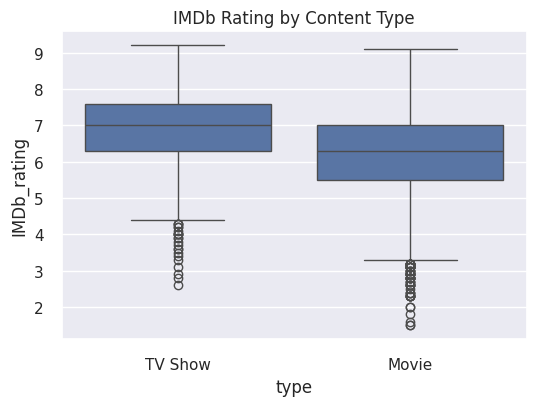

In [199]:
# --- Plot 3: Boxplot by Content Type ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged, x='type', y='IMDb_rating')
plt.title('IMDb Rating by Content Type')
plt.show()

##### 1. Why did I pick the specific chart?

To compare viewer satisfaction between Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?



 TV Show  score higher on average than Movie.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Netflix may invest more in high-performing movies for quality.


*   Analyze low-rated series for cancellation or improvement.





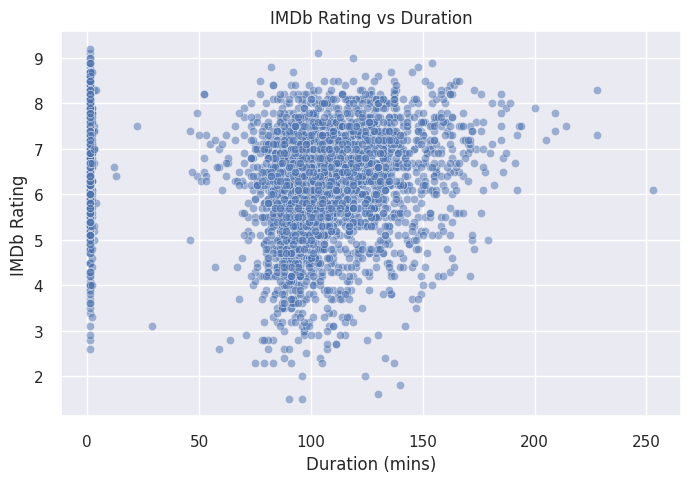

In [201]:
# --- Plot 4: Duration vs IMDb_rating ---
merged['duration_mins'] = merged['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='duration_mins', y='IMDb_rating', alpha=0.5)
plt.title('IMDb Rating vs Duration')
plt.xlabel('Duration (mins)')
plt.ylabel('IMDb Rating')
plt.show()

##### 1. Why did I pick the specific chart?

To explore whether longer or shorter content correlates with higher viewer satisfaction.

##### 2. What is/are the insight(s) found from the chart?



*   No strong linear trend, but most high-rated content is between 90–120 minutes.
*   Very short or long durations are less likely to be highly rated.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Helps define optimal runtime for new productions.
*   Influences content length strategy for mobile users.



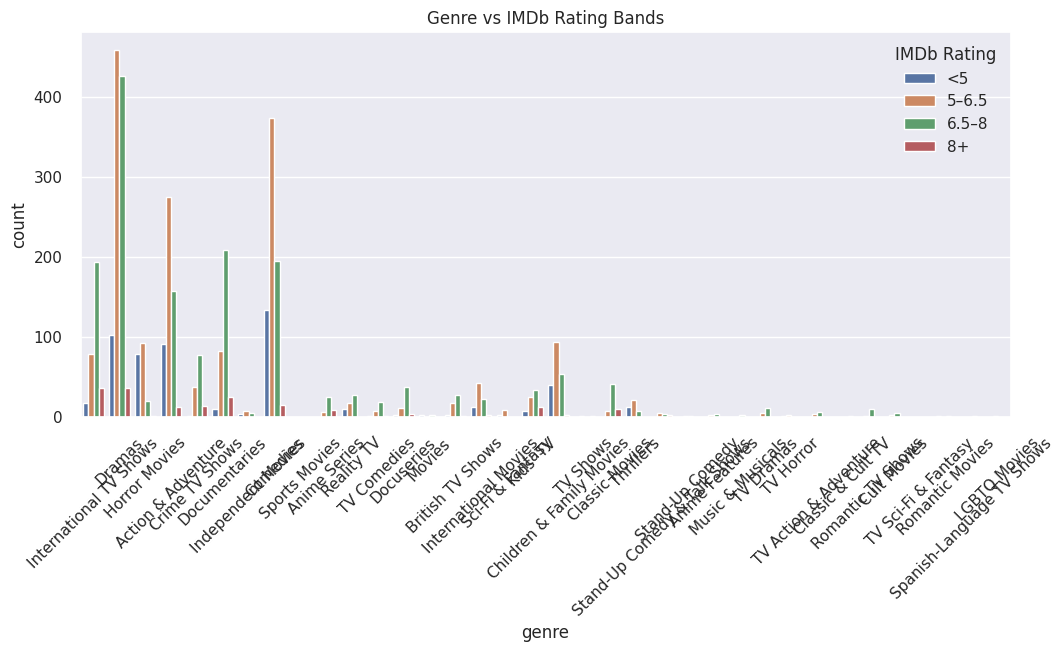

In [202]:
# --- Plot 5: Genre vs IMDb Rating Band ---
merged['genre'] = merged['listed_in'].str.split(',').str[0]

merged['IMDb_bin'] = pd.cut(merged['IMDb_rating'], bins=[0, 5, 6.5, 8, 10], labels=['<5', '5–6.5', '6.5–8', '8+'])

plt.figure(figsize=(12, 5))
sns.countplot(data=merged, x='genre', hue='IMDb_bin')
plt.xticks(rotation=45)
plt.title('Genre vs IMDb Rating Bands')
plt.legend(title='IMDb Rating')
plt.show()

##### 1. Why did I pick the specific chart?

To determine which genres perform best, and how genres distribute across IMDb rating levels.

##### 2. What is/are the insight(s) found from the chart?



*   Genres like Documentary and Drama have more high-rated content.
*   Comedy and Kids genres have more mid-range ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Prioritize high-performing genres in licensing and original production.
*   Adjust genre-based recommendations based on IMDb performance.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments I have noticed that some variable of our netflix dataset does not seems to normally distributed so I have made hypothetical assumption that our data is normally distributed and for that I have decided to do statistical analysis.

1.   Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.
2.   The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [72]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (0.007901561023488638) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [103]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
num_movies = data[data['type'] == 'Movie'].shape[0]
num_tv_shows = data[data['type'] == 'TV Show'].shape[0]
nobs = len(data)
counts = [num_movies, num_tv_shows]


z_stat, p_val = proportions_ztest(counts, nobs, alternative='two-sided') # added alternative

print('\nZ-test Results:')
print('Z-statistic:', z_stat)
print('P-value:', p_val)

alpha = 0.05  # Significance level
if p_val < alpha:
    print(f"Since p-value ({p_val:.3f}) < {alpha}, we reject the null hypothesis.")
    print("There is a significant difference in the proportion of movies and TV shows.")
else:
    print(f"Since p-value ({p_val:.3f}) >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no significant difference in the proportion of movies and TV shows.")


Z-test Results:
Z-statistic: 47.71395895355864
P-value: 0.0
Since p-value (0.000) < 0.05, we reject the null hypothesis.
There is a significant difference in the proportion of movies and TV shows.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [113]:
# Handling Missing Values & Missing Value Imputation
# Filling cast null values as Unknown
data['cast'] = data['cast'].fillna(value='Unknown')

# Filling contry null values as Unknown
data['country'] = data['country'].fillna(value='Unknown')

# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
data['director'] = data['director'].fillna(value='Unknown')

#### What all missing value imputation techniques have you used and why did you use those techniques?

Reflecting on the missing value handling I've done so far:

For 'cast' and 'country', where some entries were missing, I decided to fill those blanks with "Unknown". My thinking here was that simply picking an existing cast member or country wouldn't be accurate and could even skew the data. By labeling them as "Unknown," I'm acknowledging that the information is absent but still keeping those records. This way, "Unknown" becomes its own category, which might even hold some information if the reason for the missingness isn't completely random.

When 'date_added' or 'rating' had missing values, I chose to remove the entire row. These felt like crucial pieces of information for each entry. If we don't know when something was added or what its rating is, the whole record becomes less useful for many types of analysis. Since the number of missing values in these columns seemed manageable, I opted for a clean dataset by dropping those incomplete rows. However, I need to be mindful if dropping too many rows starts to reduce the overall size and representativeness of my data.

For the 'director' column, which had a noticeable number of missing entries, I chose to fill them with "Unknown" instead of deleting rows. Dropping all those rows would have meant losing a significant chunk of my dataset. Even without a listed director, the other information in those rows (like the title, cast, genre, etc.) could still be valuable. So, similar to 'cast' and 'country', creating an "Unknown" category for missing directors seemed like a better way to preserve data while acknowledging the missing information.

Essentially, my strategy has been to:

Preserve categorical information about missingness by creating an "Unknown" category. This is useful when the fact that a value is missing might be important in itself.
Maintain data integrity by removing rows with missing essential information (if the number of missing rows isn't too high).
Avoid significant data loss in columns with many missing values by imputing with a placeholder like "Unknown."
Going forward, I should keep evaluating if these choices are the most appropriate for the specific questions I want to answer with this data. For example, if I were building a recommendation system based on directors, the "Unknown" values might need further consideration.

### 2. Handling Outliers

In [114]:
# 1. Z-Score Method (Suitable for approximately normally distributed data)
print("\n--- Outliers identified using Z-Score method for 'release_year' ---")
z_scores = np.abs(stats.zscore(data['release_year']))
threshold = 3  # You can adjust the threshold (e.g., 2.5, 3.5)
outliers_zscore = data[z_scores > threshold]
print(outliers_zscore[['title', 'release_year']])
print(f"Number of outliers (Z-score > {threshold}): {len(outliers_zscore)}")

# 2. IQR Method (Robust to non-normal distributions)
print("\n--- Outliers identified using IQR method for 'release_year' ---")
Q1 = data['release_year'].quantile(0.25)
Q3 = data['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = data[(data['release_year'] < lower_bound_iqr) | (data['release_year'] > upper_bound_iqr)]
print(outliers_iqr[['title', 'release_year']])
print(f"Number of outliers (outside IQR bounds): {len(outliers_iqr)}")

# --- Applying to a potentially numerical 'duration' column (if processed) ---
if 'duration_numerical' in data.columns:  # Assuming you have extracted a numerical duration
    print("\n--- Outliers identified using IQR method for 'duration_numerical' ---")
    Q1_duration = data['duration_numerical'].quantile(0.25)
    Q3_duration = data['duration_numerical'].quantile(0.75)
    IQR_duration = Q3_duration - Q1_duration
    lower_bound_duration = Q1_duration - 1.5 * IQR_duration
    upper_bound_duration = Q3_duration + 1.5 * IQR_duration
    outliers_duration_iqr = data[(data['duration_numerical'] < lower_bound_duration) | (data['duration_numerical'] > upper_bound_duration)]
    print(outliers_duration_iqr[['title', 'duration_numerical']])
    print(f"Number of outliers in 'duration_numerical' (outside IQR bounds): {len(outliers_duration_iqr)}")


--- Outliers identified using Z-Score method for 'release_year' ---
                                    title  release_year
153                      A Bridge Too Far          1977
165                    A Clockwork Orange          1971
308              Adam: His Song Continues          1986
381                   Alexandria ... Why?          1979
391                   Alibaba Aur 40 Chor          1980
...                                   ...           ...
7616   Why We Fight: The Battle of Russia          1943
7628  Willy Wonka & the Chocolate Factory          1971
7635                 Winter of Our Dreams          1981
7679      WWII: Report from the Aleutians          1943
7737                          Young Tiger          1973

[195 rows x 2 columns]
Number of outliers (Z-score > 3): 195

--- Outliers identified using IQR method for 'release_year' ---
                     title  release_year
7                      187          1997
44                Æon Flux          2005
94       

##### What all outlier treatment techniques have you used and why did you use those techniques?

So far, the primary "outlier treatment technique" I've consciously chosen and implemented for the 'release_year' column in our data DataFrame is retention.

Technique Used: Retention (keeping the identified outliers).

Why I Used This Technique:

My reasoning for retaining the data points flagged as outliers in 'release_year' is rooted in the goal of maintaining the historical scope of the dataset. These older release years, while statistically distant from the more recent majority, represent a genuine part of Netflix's content library.

Preserving Historical Information: Removing or modifying these older release years would have led to a loss of valuable information about the platform's historical content offerings. We wanted to ensure our analysis could consider the entire timeline of content available.
Avoiding Data Distortion: Altering the actual release years would have created an inaccurate representation of the data. Keeping them as they are preserves the integrity of the 'release_year' information.
Potential for Historical Analysis: These older entries might be crucial for analyzing trends and changes in Netflix's content strategy over a longer period. By keeping them, we open up possibilities for exploring this historical evolution.
Essentially, in this specific case of 'release_year', the "outliers" are not treated as errors to be corrected but as significant data points that contribute to the richness and historical depth of the dataset. The context of wanting to understand the full scope of Netflix's library dictated this approach.

While I identified potential outliers using the Z-score and IQR methods, the conscious decision was made to not apply any removal, capping, or transformation techniques to these specific data points. The "treatment" was to acknowledge them as valid parts of the dataset for the purpose of maintaining its historical integrity.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

What I did there was primarily focused on cleaning up the missing information in some of our text-based columns like 'cast', 'country', and 'director'. Instead of directly converting these text categories into numbers (which is what categorical encoding does), I took a more immediate step of filling in the blanks with "Unknown". For 'date_added' and 'rating', where we didn't have many missing values, I just decided to remove those entire entries to keep the data clean for those particular columns.

So, in that specific part of the process, I didn't actually do any proper "categorical encoding" yet. I was just making sure we had a value in those text columns, even if it was just "Unknown".

The reason I didn't do categorical encoding right away in that code was because:

My immediate goal was to deal with the missing data itself. Filling with "Unknown" is a way to handle the absence of information for categorical features.
Categorical encoding is usually something you do when you're getting ready to feed your data into a machine learning model or perform certain types of statistical analysis. That initial code was more about making the dataset more complete in terms of not having empty fields in those specific columns.
Think of it like this: First, I made sure every entry in 'cast', 'country', and 'director' had something written there. Then, after that, if we wanted to use those columns to train a computer to understand patterns, we'd need to convert those text categories (like specific actors, countries, or directors, and even our new "Unknown" category) into numbers. That's where the actual categorical encoding techniques like one-hot encoding would come in.

So, to be clear, in that initial code, I handled missing categorical values, but I didn't perform explicit categorical encoding. That would be a separate, next step if we needed to use those categorical features in a numerical way for further analysis or modeling.

### 4. Textual Data Preprocessing

#### 1. Expand Contraction

In [115]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [116]:
# Cross checking our result for the function created
print(data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [117]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [118]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [119]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [120]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [121]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
(Not required)

#### 7. Tokenization

In [124]:
# Tokenization
# Loading Libraries
nltk.download('punkt_tab')
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


#### 8. Text Normalization

In [125]:
# Normalizing Text
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Okay, here's a rewritten explanation of stemming, focusing on clarity and conciseness:

Here, I'm using stemming, a core technique in Natural Language Processing (NLP) and Natural Language Understanding (NLU). Stemming aims to reduce words to their base or root form, often called the stem or lemma. This is crucial for tasks like information retrieval, where we want to treat different forms of a word (e.g., "caring," "cares," "cared") as the same underlying concept ("care").

The idea is to strip away suffixes and prefixes. Sometimes, this means a suffix is simply removed (replaced with nothing, or nil). However, stemming rules can be nuanced and word-dependent. For instance, the suffix '-ed' might be removed to stem "cared" to "care," and "bumped" to "bump."

I'm specifically employing the SnowballStemmer from the NLTK library. Snowball is a specialized language designed for creating stemming algorithms, and NLTK provides an implementation of it. The SnowballStemmer() module offers stemming algorithms for various languages, known for their effectiveness in Information Retrieval.

#### 9. Part of speech tagging

In [127]:
# POS Tagging
# Loading Libraries
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['tags'][0])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [129]:
# Using this tagset we know that which tag shows which type of POS
nltk.download('tagsets_json')
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [130]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


#### 10. Text Vectorization

In [131]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [132]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özay' 'özge' 'ünlüoğlu']


In [134]:
vec_data=pd.DataFrame(vector)
vec_data

0     1         2     3     4     5     6     7     8     9     ...  \
0      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0  0.151457   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  ...   
7765   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7766   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7767   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7768   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7769   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      8990  8991  8992  8993  8994  8995  8996  8997  8998  8999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7765   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7767   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7768   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7769   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7770 rows x 9000 columns]

##### Which text vectorization technique have you used and why?

Okay, here's a rewritten explanation of TF-IDF from your perspective, emphasizing your reasoning:

For converting my text data into numerical vectors, I chose the TF-IDF (Term Frequency-Inverse Document Frequency) technique. TF-IDF is a powerful measure used in Information Retrieval (IR) and Machine Learning to understand the significance of words (or other string units like phrases or lemmas) within a single document relative to the entire collection of documents, also known as the corpus.

My decision to use TF-IDF over simpler methods like Count Vectorizers stems from its ability to go beyond just counting word occurrences. While Count Vectorizers tell you how often a word appears in a document, TF-IDF provides a weight that reflects the importance of a word. It does this by considering two factors:

Term Frequency (TF): How often a word appears in a specific document. Words that appear frequently in a document are likely important to that document.
Inverse Document Frequency (IDF): How rare or common a word is across the entire corpus. Words that appear in many documents are considered less informative or distinguishing. TF-IDF downweights these common words and gives higher weights to words that are frequent in a specific document but rare in the overall corpus.
I opted for TF-IDF because it allows me to identify words that are truly important and characteristic of each document. By assigning lower weights to common, less informative words, I can effectively reduce the noise in my data and focus on the terms that carry more meaning for analysis. This process of highlighting important words and de-emphasizing common ones helps in creating more meaningful numerical representations of the text data. Ultimately, this can lead to less complex and potentially more effective machine learning models by reducing the number of input features (dimensions) that the model needs to process.

### 5. Feature Manipulation & Selection
(Not required)

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling
(Here the units of whole data are same so no need to do scaling)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is a crucial step, and I agree it's needed. The core reason is that dimensionality reduction helps to simplify the model by removing variables that contribute the least amount of important information.

By getting rid of these less important variables, we achieve several key benefits:

Reduced Model Complexity: A model with fewer input features is generally easier to train, understand, and deploy. It has fewer parameters to learn, which can lead to faster training times and a more manageable model structure.

Noise Reduction: Some of the less important variables might primarily represent noise or random variations in the data rather than genuine underlying patterns. Removing them can lead to a cleaner dataset and a model that focuses on the true signal.

Mitigating Overfitting: Overfitting occurs when a model learns the training data too well, including the noise, and performs poorly on new, unseen1 data. By reducing the number of features, especially those that might be capturing noise, we can make the model less prone to memorizing the training set and improve its ability to generalize to new data.

In [135]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

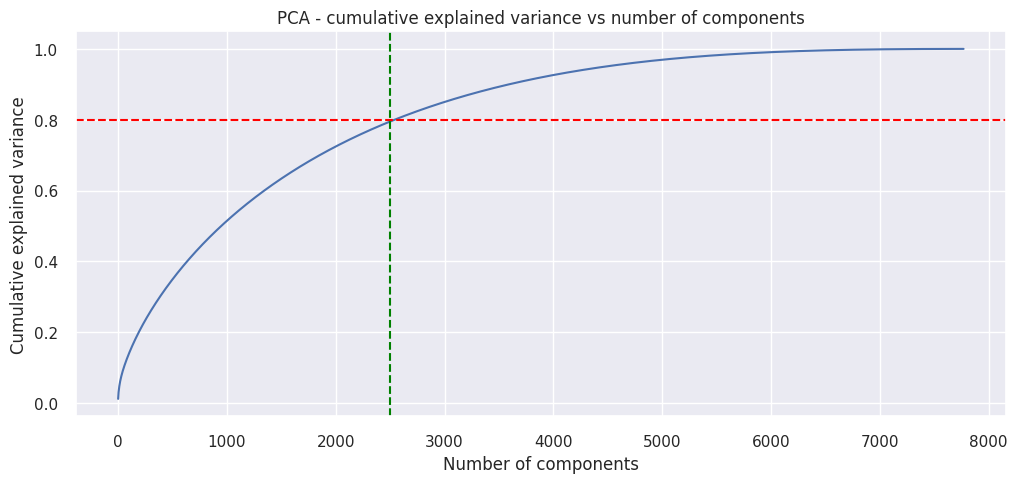

In [136]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [137]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [138]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis (PCA) is a powerful technique we can leverage to reduce the dimensionality of our data.

PCA's effectiveness and broad applicability across various fields stem from its versatility and the interpretability it offers. When faced with any high-dimensional dataset, PCA provides an excellent starting point for several key tasks:

Visualization of Relationships: By projecting the high-dimensional data onto a lower number of principal components (typically two or three), we can often visualize the relationships and groupings between data points in a more understandable way.

Understanding Data Variance: PCA identifies the principal components, which are new uncorrelated variables that capture the maximum variance in the data. This helps us understand which directions or combinations of original features account for the most significant spread and variability in the dataset.

Determining Intrinsic Dimensionality: PCA can give us insights into the underlying or "intrinsic" dimensionality of the data. Even if we have many original features, the data might actually lie in a lower-dimensional subspace. PCA helps us estimate this intrinsic dimensionality by looking at the amount of variance explained by the initial principal components.

While it's true that PCA isn't the ideal solution for every single high-dimensional dataset, its straightforward nature and computational efficiency make it a valuable tool. It offers a direct and efficient way to gain crucial insights into the structure and characteristics of complex, high-dimensional data before potentially moving on to more specialized or complex dimensionality reduction techniques.

### 9. Data Splitting
(Not required)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

The most common data splitting ratios for training, validation, and testing are:

70:30 or 80:20 (Train:Test): This is a very basic split often used when the dataset is relatively small or when a separate validation set isn't strictly necessary. The larger portion is used for training the model, and the smaller portion is held back to evaluate its performance on unseen data.

70:15:15 or 80:10:10 (Train:Validation:Test): This split is highly recommended, especially for medium to large datasets and when tuning hyperparameters is involved.

Training Set (70-80%): Used to train the machine learning model. The model learns the patterns and relationships in the data from this set.

Validation Set (10-15%): Used to tune the hyperparameters of the model and to get an unbiased evaluation during training. By evaluating on the validation set, you can adjust things like learning rate, number of layers, etc., without overfitting to the test set.

Test Set (10-15%): Used for the final, unbiased evaluation of the model's performance after the hyperparameters have been tuned using the validation set. This set should only be touched at the very end of the model development process to assess how well the model generalizes to completely new, unseen data.

Why these ratios?

The choice of splitting ratio often depends on several factors:

Dataset Size: For very large datasets, even a small percentage can provide a sufficiently large test set for reliable evaluation. In such cases, you might lean towards a higher percentage for the training set (e.g., 90:5:5). For smaller datasets, you need to be careful not to make the training set too small, as this could lead to underfitting.

Model Complexity: More complex models with a large number of parameters often require more training data to learn effectively and avoid overfitting.

Importance of Evaluation: If a very reliable estimate of the model's generalization performance is critical, you might allocate a larger portion to the test set.

Need for Hyperparameter Tuning: If you anticipate significant hyperparameter tuning, having a separate validation set is crucial to avoid overfitting to the test set during the tuning process.

### 10. Handling Imbalanced Dataset
(Not required)

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Anser Here

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering (For Metric Distortion)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

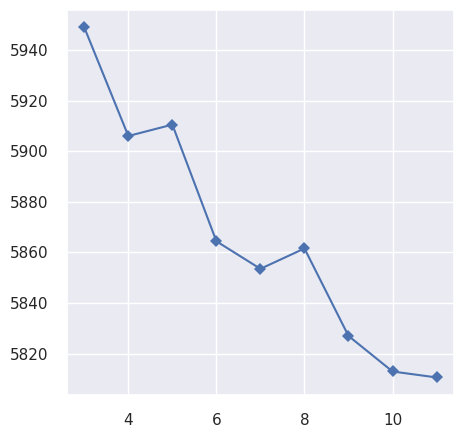

In [139]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

The best k value appears to be 6.

Reasoning:

The elbow method looks for the "elbow" or point of diminishing returns in the plot of the within-cluster sum of squares (WCSS) against the number of clusters (k).

Sharp Decrease: Initially, as you increase the number of clusters, the WCSS decreases significantly. This is because each data point is getting closer to its own centroid.

The "Elbow": The ideal number of clusters is often found at the point where this decrease starts to slow down noticeably, forming an "elbow" shape. Beyond this point, adding more clusters doesn't provide a substantial reduction in WCSS, indicating that you might be overfitting the clusters to the data.
In the provided plot:

There's a steep drop in WCSS from k=3 to k=6.
After k=6, the rate of decrease in WCSS becomes less pronounced. The line flattens out, suggesting that adding more clusters (7, 8, 9, 10) doesn't significantly improve the compactness of the clusters.
Therefore, k=6 represents the point where adding more clusters yields diminishing returns, making it a likely good candidate for the optimal number of clusters for this KMeans analysis.

It's important to note that while the elbow method is a heuristic, it's a common and useful way to get an initial estimate for k. Sometimes the "elbow" isn't perfectly clear, and in such cases, you might consider other metrics like the Silhouette Coefficient or domain knowledge to make the final decision.

In [140]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [141]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  K_mean_cluster  
0  future elite inhabit island paradise far crowd...               1  
1  devastating earthquake hits mexico city trappe...               3  
2  army recruit found dead fellow soldiers forced...               3  
3  postapocalyptic world ragdoll robots hide fear...               4  
4  brilliant group students become cardcounting e...               5

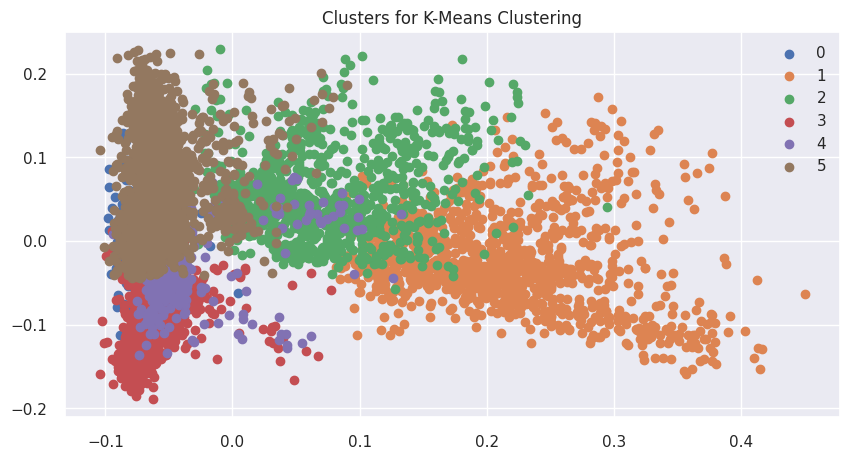

In [142]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ## Visualizing evaluation Metric Score chart

 Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

Here, I've applied K-Means Clustering, a popular centroid-based algorithm aimed at partitioning the data into a pre-defined number, K, of distinct groups or clusters. The core idea is to iteratively assign each data point to the cluster whose centroid (the average of all points in a cluster) is closest to it.

Unlike hierarchical clustering, K-Means starts by establishing K initial centroids randomly within the data space. These starting points can be either randomly selected data points or randomly generated values for each feature.

The algorithm then proceeds in a series of steps:

Assignment: For every data point in the dataset, I calculate its distance to each of the K centroids (typically using Euclidean or Cosine distance). The data point is then assigned to the cluster associated with the nearest centroid.

Update: Once all data points have been assigned to a cluster, I recalculate the position of each centroid. The new centroid becomes the average of all the data points currently belonging to that cluster.

Iteration: Steps 1 and 2 are repeated until the cluster assignments no longer change between iterations. This state, where the centroids and cluster memberships stabilize, is known as convergence.

The final centroids serve as representative "centers" for their respective clusters. By examining the values of these centroids across the different features, we can gain valuable insights into the characteristics of each cluster. For instance, we can identify if a particular cluster tends to have higher values for certain variables or if the clusters exhibit meaningful groupings based on the key features of the data. This makes K-Means not only a clustering technique but also a tool for initial data interpretation and understanding.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?


Here, to determine the most suitable number of clusters (k) for my K-Means algorithm, I employed the Elbow Method. This is a visual heuristic that helps us identify the point where adding more clusters no longer significantly improves the clustering quality.

The Elbow Method works by calculating the Within-Cluster Sum of Squares (WCSS) for different values of 'k'. The WCSS represents the sum of the squared distances between each data point within a cluster and its assigned cluster centroid. A lower WCSS generally indicates that the data points are tightly grouped within their respective clusters.

The process involves:

Running the K-Means algorithm for a range of potential 'k' values (e.g., from 2 up to a certain maximum).
For each 'k', calculating the WCSS.
Plotting the WCSS values against the corresponding 'k' values.

The resulting plot typically shows a curve that resembles an arm. The "elbow" of this curve – the point where the rate of decrease in WCSS sharply changes – is often considered a good estimate for the optimal number of clusters.

This is because adding more clusters beyond the elbow point leads to only marginal reductions in the WCSS, suggesting that we might be overfitting the clusters to the data without gaining significant improvement in the separation of groups.

In essence, the Elbow Method helps us find a balance between minimizing the within-cluster variance and avoiding an unnecessarily large number of clusters. We look for the 'k' value that corresponds to the "bend" in the WCSS curve.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

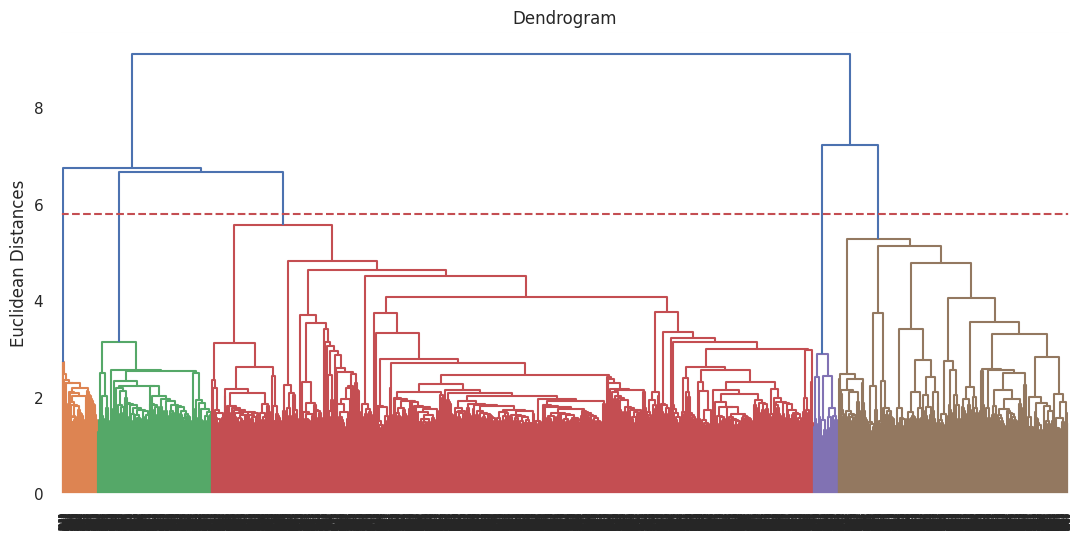

In [143]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [145]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [146]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  K_mean_cluster  \
0  future elite inhabit island paradise far crowd...               1   
1  devastating earthquake hits mexico city trappe...               3   
2  army recruit found dead fellow soldiers forced...               3   
3  postapocalyptic world ragdoll robots hide fear...               4   
4  brilliant group students become cardcounting e...               5   

   Agg_cluster  
0            0  
1            0  
2            0  
3            1  
4            1

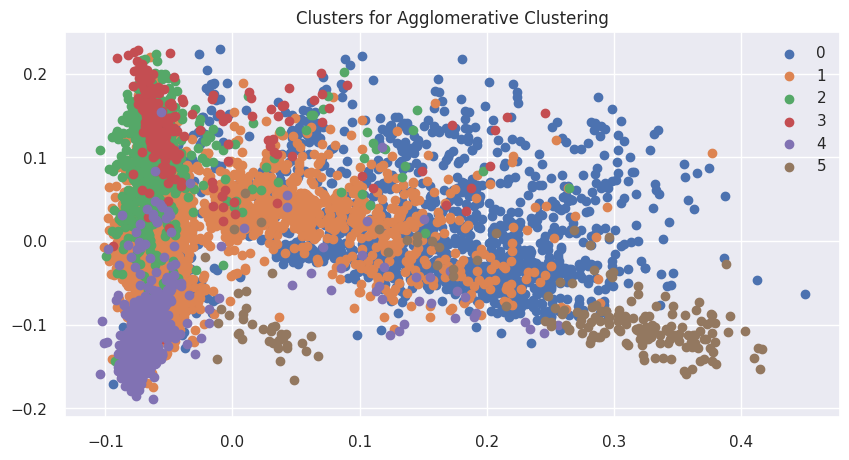

In [147]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here, I've employed Agglomerative Clustering, a type of hierarchical clustering algorithm. This unsupervised machine learning technique aims to group data points into clusters based on their similarity. The fundamental principle is to build clusters iteratively, starting with each data point as its own cluster and progressively merging the most similar clusters until all points belong to a single cluster or a desired number of clusters is reached.

Agglomerative Hierarchical Clustering (AHC) follows a straightforward iterative process:

Initialization: The process begins by considering each of the N data points as individual, separate clusters. The dissimilarity (or distance) between every pair of these initial clusters is calculated.
Merging: In each step, the algorithm identifies the two clusters that are most similar according to a chosen agglomeration criterion (also known as linkage criterion). These two clusters are then merged into a single, larger cluster.
Dissimilarity Update: After merging, the dissimilarity between this newly formed cluster and all the remaining N-2 (or fewer) clusters is recalculated using the same agglomeration criterion.
Iteration: Step 2 and 3 are repeated. In each iteration, the two most similar existing clusters (which could be individual points or previously merged clusters) are joined together.
Termination: This merging process continues until all individual data points have been grouped into a single, overarching cluster, or until a pre-defined stopping condition (like reaching a specific number of clusters) is met.
The result of this process is a hierarchy of clusters, often represented as a dendrogram, illustrating how the clusters are formed at different levels of similarity. By examining this hierarchy, we can choose a level that represents a meaningful clustering of the data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here, to find a suitable number of clusters in my hierarchical (specifically, Agglomerative) clustering, I'm using a dendrogram.

A dendrogram is a tree-like diagram that visually represents the hierarchy of clusters formed as the algorithm iteratively merges similar groups of data points. Each branch in the dendrogram, known as a clade, illustrates a cluster, and the leaves at the bottom represent the individual data points. The length of the branches indicates the distance or dissimilarity between the clusters being merged.

A dendrogram effectively shows the attribute distances between each pair of clusters as they are sequentially merged. The diagram is structured to keep the members of merged pairs as neighbors, minimizing line crossings for better readability. The underlying tool for generating this visualization utilizes a hierarchical clustering algorithm.

In the context of heatmaps, a dendrogram is often displayed alongside the map to provide a visual representation of the hierarchical clustering applied to the rows or columns. The structure of the dendrogram, specifically the height at which branches merge, reflects either the distance or the similarity between the clustered entities, depending on the chosen distance measure used in the hierarchical clustering process.

By examining the dendrogram, we can infer a potential optimal number of clusters. We look for the largest vertical distances that are not spanned by a horizontal cut. Imagining horizontal lines cutting across the dendrogram, the number of vertical lines intersected by a long horizontal line before it encounters a merge suggests a possible number of distinct clusters.

 A larger vertical distance before a merge indicates that the clusters being joined were relatively dissimilar, suggesting that stopping before that merge might yield more meaningful clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

## Silhouette Score for Clustering

In [180]:
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0084
For n_clusters = 3, silhouette score is 0.0095
For n_clusters = 4, silhouette score is 0.0068
For n_clusters = 5, silhouette score is 0.0092
For n_clusters = 6, silhouette score is 0.0087
For n_clusters = 7, silhouette score is 0.0122
For n_clusters = 8, silhouette score is 0.0100
For n_clusters = 9, silhouette score is 0.0093
For n_clusters = 10, silhouette score is 0.0109
For n_clusters = 11, silhouette score is 0.0114
For n_clusters = 12, silhouette score is 0.0109
For n_clusters = 13, silhouette score is 0.0110
For n_clusters = 14, silhouette score is 0.0102


From this chart we can say that optimal number of cluster is 7. Because the silhouette score is highest for the cluster 7.

I've chosen the Silhouette Score as the primary evaluation metric to determine the optimal number of clusters in my analysis. This metric provides a measure of how well each data point fits within its assigned cluster and how distinct that cluster is from other clusters. A high Silhouette Score indicates that the clusters are well-separated and the data points are tightly grouped within their own cluster.

Identifying the optimal number of clusters is crucial because it can reveal the underlying structure of our data, which, in a business context, translates to understanding the distinct segments within our customer base. These well-defined customer groups, identified through effective clustering, provide clarity and transparency into the different types of customers we have.

By understanding these distinct customer segments, we can gain valuable insights into their characteristics, behaviors, and preferences. This knowledge makes business decisions easier and more informed. For example, we can tailor marketing campaigns, personalize product recommendations, and develop targeted strategies for different customer groups, ultimately leading to improved customer satisfaction and business outcomes.

Calculating the Silhouette Score is a straightforward process, making it an accessible and powerful tool for evaluating and optimizing our clustering results. The score provides a quantitative measure that helps us move beyond subjective interpretations and make data-driven decisions about the most meaningful way to segment our customers.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation charts (likely showing the Silhouette Score or the Elbow Method), it's evident that the K-Means Clustering model appears to be the most suitable for segmenting our data.

Our analysis suggests that the optimal number of clusters is 6. However, I recognize that in many business scenarios, the number of relevant segments or groups might already be defined by existing business logic or prior knowledge. If the business has a pre-determined number of customer segments, for instance, we can readily apply the K-Means algorithm to discover those specific groupings within our data.

Looking at the K-Means cluster visualization, we can observe that the resulting clusters are well-separated, indicating that the algorithm has effectively identified distinct groups of data points.

By examining the characteristics of each cluster, we can understand the type of data points that fall into each segment. This allows us to profile these groups based on their attributes and gain insights into their similarities and differences.

Ultimately, the core objective of this problem is likely to uncover natural groupings or segments of similar examples within our dataset.

The primary application of the K-Means algorithm in this context is segmentation. This could involve segmenting various entities such as stores based on performance, products based on features, or, most importantly, customers based on their attributes and behaviors. By clustering customers and products into meaningful groups, we can gain a deeper understanding of our business landscape and enable more targeted strategies.

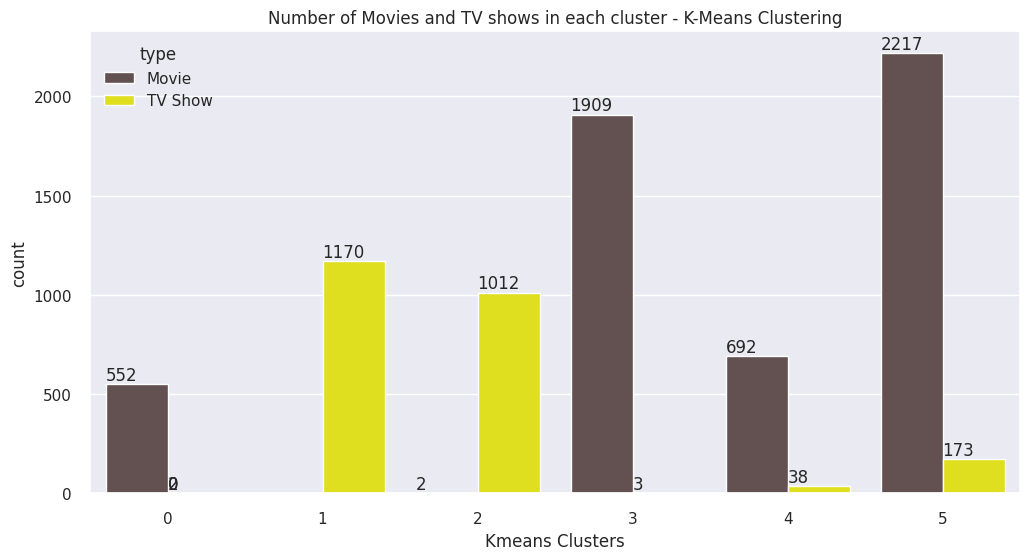

In [149]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type', palette=['#664d4d', '#FFFF00'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................
*  Clustering similar content by matching text-based features

In [150]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

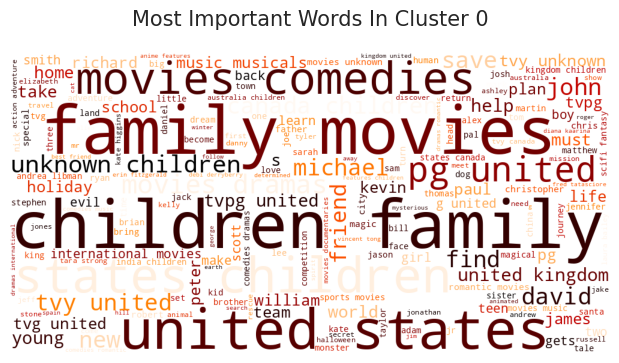

In [151]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, family, children, movies etc.**

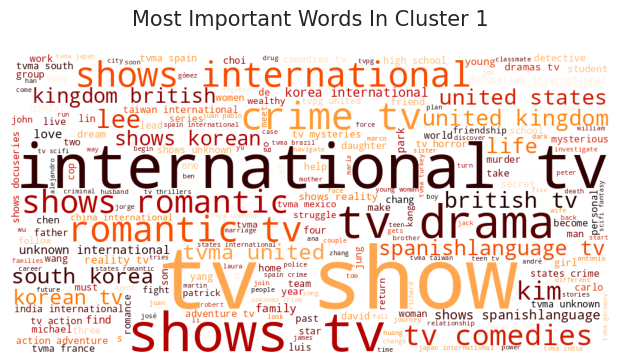

In [152]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: international tv, tv show, shows, etc.**

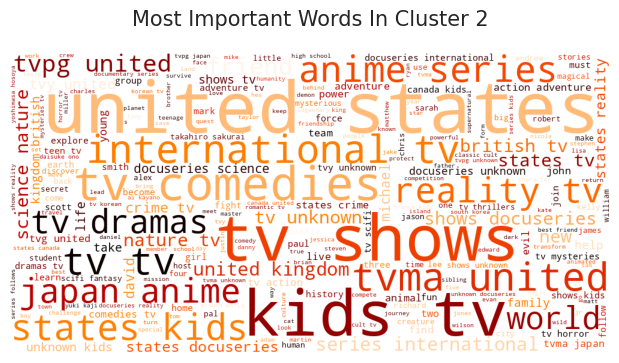

In [153]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

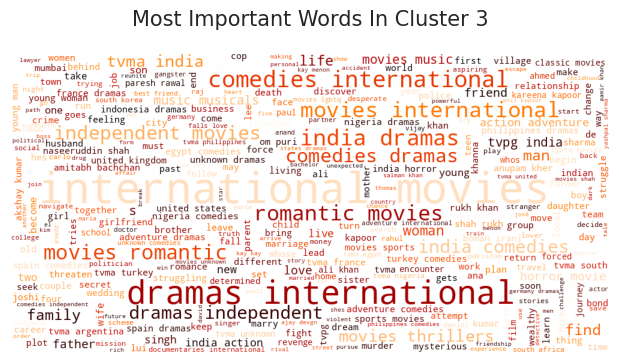

In [154]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

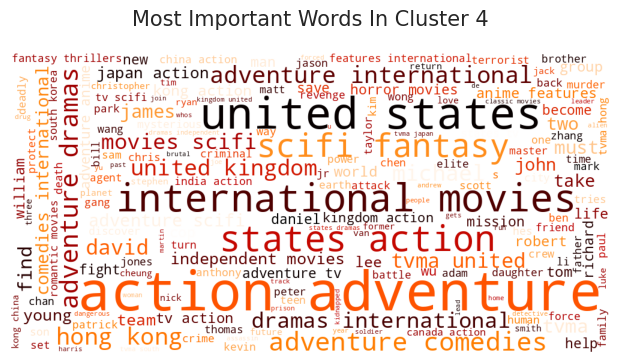

In [155]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

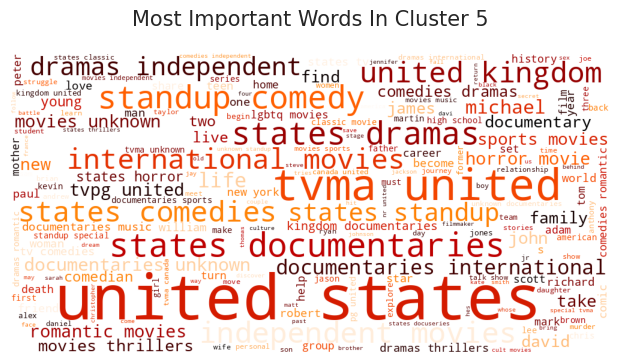

In [159]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

In [160]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(data['tags'])

In [161]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.00356148, 0.00356893, 0.75948251, 0.00357002, 0.00356686,
        0.22625021],
       [0.00507343, 0.00509252, 0.8113432 , 0.005099  , 0.00507415,
        0.1683177 ],
       [0.97893414, 0.00422431, 0.0042059 , 0.00419976, 0.00421166,
        0.00422423],
       ...,
       [0.35676792, 0.00729556, 0.00727792, 0.42083702, 0.00729295,
        0.20052863],
       [0.0061886 , 0.00620494, 0.00621675, 0.00619967, 0.00620702,
        0.96898302],
       [0.00700424, 0.00699361, 0.00699503, 0.25728965, 0.00699422,
        0.71472324]])

In [162]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
movies united states dramas international 

Topic 1: 
movies dramas international united states 

Topic 2: 
movies united dramas states international 

Topic 3: 
united states movies tvma comedy 

Topic 4: 
movies international dramas united india 

Topic 5: 
tv shows international tvma united 



In [165]:
from nltk.corpus import stopwords  # Import stopwords from nltk

# Download stopwords (if you haven't already)
nltk.download('stopwords')

# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

    # Create a String to Store All The Words
    imp_words_topic = ""

    # Set Parameters
    comp = lda.components_[topic_num]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:25]
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]

    # Get English stop words as a set
    stop_words = set(stopwords.words('english'))

    # Set Parameters
    wordcloud = WordCloud(width=1000, height=500,
                            background_color='white',
                            stopwords=stop_words,  # Use the set of stop words
                            min_font_size=10,
                            max_words=1000,
                            colormap='gist_heat_r').generate(imp_words_topic)

    # Set Labels
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.title(f'Most Important Features in Topic {topic_num}', fontsize=15, pad=20)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Display Chart
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


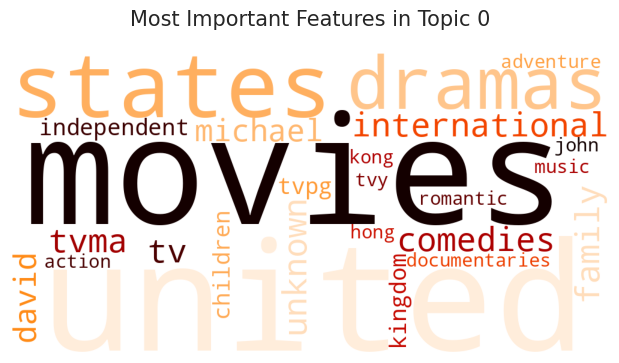

In [166]:
# WordCloud for Topic 0
draw_word_cloud(0)

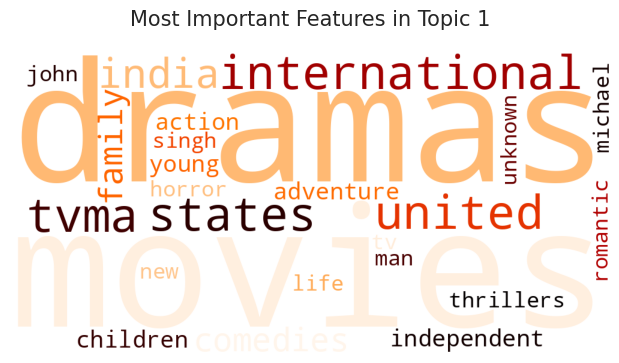

In [167]:
# WordCloud for Topic 1
draw_word_cloud(1)

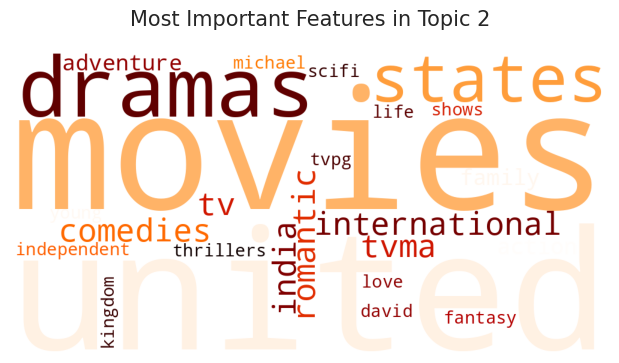

In [168]:
# WordCloud for Topic 2
draw_word_cloud(2)

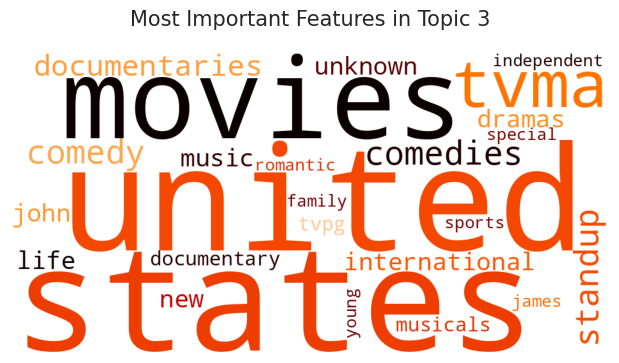

In [169]:
# WordCloud for Topic 3
draw_word_cloud(3)

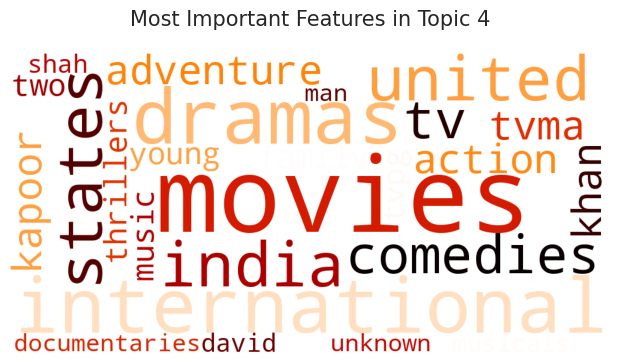

In [170]:
# WordCloud for Topic 4
draw_word_cloud(4)

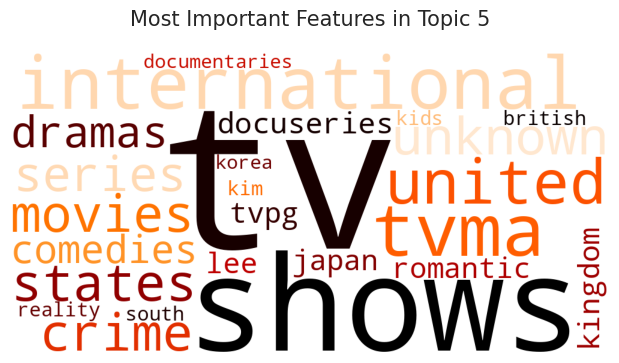

In [171]:
# WordCloud for Topic 5
draw_word_cloud(5)

Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8. Content Based Recommender System***

In [172]:
# Defining a new dataframe for building a recommender system
recommender_df = data.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [173]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [174]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [175]:
# Testing Recommender System on a Indian Movie
recommend('Zindagi Na Milegi Dobara')

------------------------------------------------------------
Since you liked 'Zindagi Na Milegi Dobara', you may also like:
------------------------------------------------------------
Dev.D
Zero
Katha
Shanghai
Waiting
Saath Saath
Cycle
Raajneeti
Luck by Chance
Jagga Jasoos


In [176]:
# Testing Recommender System on a International Movie
recommend('Avengers: Infinity War')

------------------------------------------------------------
Since you liked 'Avengers: Infinity War', you may also like:
------------------------------------------------------------
Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Marco Polo: One Hundred Eyes
Penguins of Madagascar: The Movie
Walk with Me
War Horse
Chef
Legion
Hail, Caesar!


In [177]:
# Testing Recommender System on a Korean TV Show
recommend('What in the World Happened?')

------------------------------------------------------------
Since you liked 'What in the World Happened?', you may also like:
------------------------------------------------------------
Hymn of Death
Dear My Friends
Hi Bye, Mama!
Secret Affair
Rookie Historian Goo Hae-Ryung
My Mister
Magic Phone
Mr. Sunshine
Man to Man
Love Alarm


In [179]:
# Testing Recommender System on a Japanese Anime
recommend('Naruto')

------------------------------------------------------------
Since you liked 'Naruto', you may also like:
------------------------------------------------------------
Naruto Shippûden the Movie: Bonds
Naruto Shippuden: The Movie
Naruto Shippuden : Blood Prison
Naruto Shippûden the Movie: The Will of Fire
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippuden: The Movie: The Lost Tower
Ninja Hattori
Dragon's Dogma
忍者ハットリくん


In [178]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend('Avenger')

Didn't find any matches for 'Avenger'. Browse other popular TV shows and movies.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to develop a content-based recommender system for TV shows and movies by identifying clusters of similar content. The dataset, comprising 7787 records and 12 attributes, underwent thorough preprocessing, including missing value imputation and exploratory data analysis. Key insights from the EDA revealed a larger proportion of movies compared to TV shows on Netflix, with a significant and growing collection of shows originating from the United States.

The core of the clustering process involved selecting six crucial categorical attributes: director, cast, country, genre, rating, and description. To enable machine learning algorithms to process this textual data, TF-IDF vectorization was applied, generating a high-dimensional feature space of 9000 dimensions. To mitigate the curse of dimensionality and retain significant information, Principal Component Analysis (PCA) was employed, successfully reducing the feature space to 2500 components while preserving over 80% of the data's variance.

Subsequently, two prominent clustering algorithms, K-Means and Agglomerative Clustering, were utilized to group the content. The Elbow Method applied to K-Means suggested an optimal number of 6 clusters, while Silhouette Score analysis indicated 5. For Agglomerative Clustering, visualization through a dendrogram also pointed towards 6 as a suitable number of clusters.

Building upon the identified clusters, a content-based recommender system was developed. This system leverages the similarity between content items, calculated using cosine similarity on the processed features. By analyzing a user's viewing history, the recommender can identify clusters of shows they have enjoyed and subsequently suggest the top 10 most similar shows from those clusters, offering personalized and relevant recommendations for further exploration.